<a href="https://colab.research.google.com/github/vanessamr/Data_Visualization/blob/main/Copia_de_TidyData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tidy Data on Python

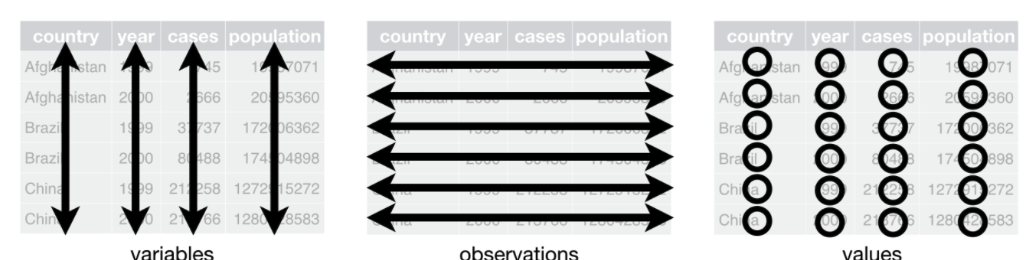

En esta lectura, vamos a conocer un catálogo de funciones y métodos para transformar nuestros datos en caso de que no cumplan ya con los principios de los [datos ordenados](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) o tidy data.

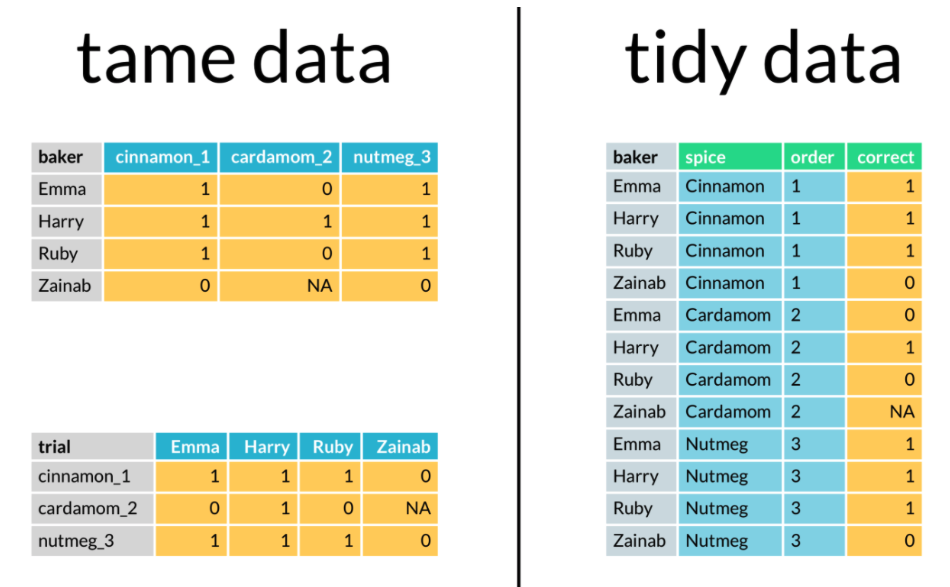

Los principios sobre datos ordenados parecen tan obvios que te podrías preguntar si alguna vez encontrarás un dataset que no esté ordenado. Desafortunadamente, gran parte de los datos que vas a encontrar están desordenados. Existen dos principales razones para esto:
 - La mayoría de las personas no están familiarizadas con los principios de datos ordenados y es difícil derivarlos por cuenta propia a menos que pases mucho tiempo trabajando con datos.
 - Los datos a menudo están organizados para facilitar tareas distintas del análisis. Por ejemplo, los datos se organizan para que su registro sea lo más sencillo posible.

Esto significa que para la mayoría de los análisis necesitarás hacer algún tipo de orden. El primer paso es entender siempre cuáles son las variables y las observaciones. Esto a veces es fácil; otras veces deberás consultar con quienes crearon el dataset. El segundo paso es resolver uno de los siguientes problemas frecuentes:
 - Una variable se extiende por varias columnas
 - Una observación está dispersa entre múltiples filas.
 
> ## Tidy Data is a way of structuring datasets to facilitate analysis.

#### En tidy data:

    1. Cada Variable debe tener su propia columna
    2. Cada Observación debe tener su propia fila
    3. Cada dato debe ser atómico y forma una tabla
    
#### Ejemplos de Datos Desordenados 🤯 🤐

    * Los headers en las columnas son VALORES y no nombres de variables <- muy común
    * Multiples variables guardadas en la misma columna
    * Variables guardadas una parte en columnas otras en filas
    * Los valores no són atómicos 

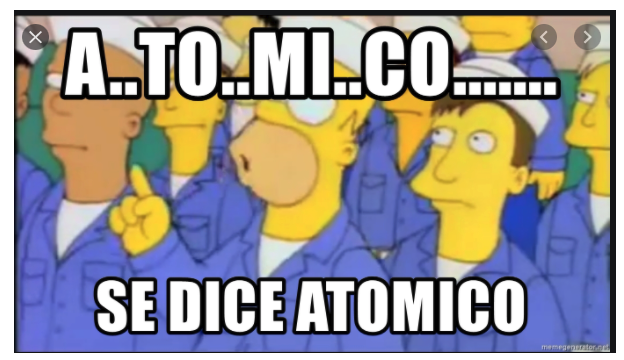


In [6]:
import pandas as pd

Ponemos manos a la obra

In [7]:
d = {'pais': ['Colombia', 'México', 'Salvador'], '1999': [745, 37737, 212258], '2000': [2666, 80488, 213766]}
df = pd.DataFrame(data=d)
df

,pais,1999,2000
0,Colombia,745,2666
1,México,37737,80488
2,Salvador,212258,213766


¿Cómo podríamos mejorar un poco esta tabla para tener la información mas clara?



¡tiene como columnas los que parecieran ser añooos!


Pandas.melt() unpivots a DataFrame from wide format to long format.

In [8]:
pd.melt?

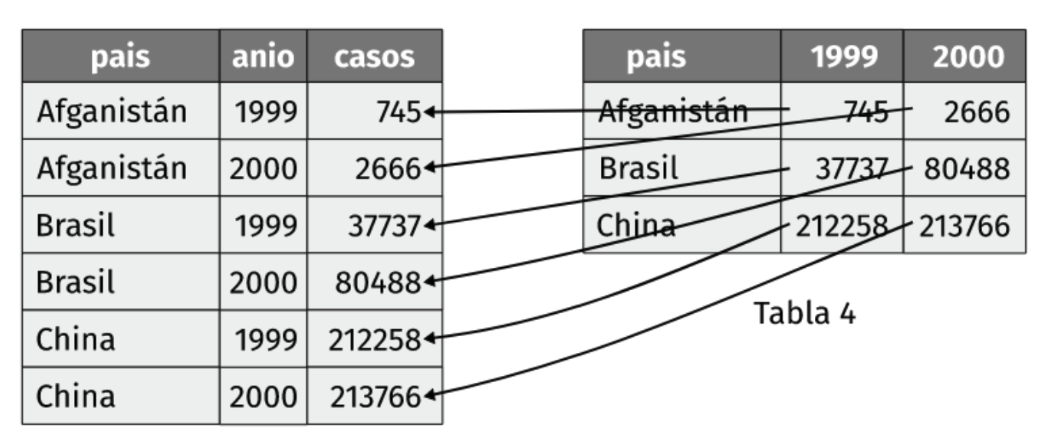

In [9]:
#Código aquí para modificar la tabla con pd.melt
pd.melt(df, id_vars='pais', var_name='anio', value_name='cuenta')

,pais,anio,cuenta
0,Colombia,1999,745
1,México,1999,37737
2,Salvador,1999,212258
3,Colombia,2000,2666
4,México,2000,80488
5,Salvador,2000,213766


Otro ejemplo para aplicar la función de melt

In [35]:
# Otro Ejemplo
df_relinc=pd.read_csv("religion_income.csv")
df_relinc.head()

,religion,<10k,10-20k,20-30k,30-40k,40-50k,50-75k,75-100k,100-150k,>150k,refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,refused,15,14,15,11,10,35,21,17,18,116


In [11]:
# Escribe aquí tu código
religion_melted = df_relinc.melt(id_vars=["religion"], var_name=["income"], value_name="frecuency")
religion_melted.tail(39)

,religion,income,frecuency
141,Other Faiths,100-150k,40
142,Other World Religions,100-150k,4
143,Unaffiliated,100-150k,321
144,Agnostic,>150k,84
145,Atheist,>150k,74
146,Buddhist,>150k,53
147,Catholic,>150k,633
148,refused,>150k,18
149,Evangelical Prot,>150k,414
150,Hindu,>150k,54


## Ejemplo de Formato Long a Formato Wider


usando wider_to_long.pivot_table

In [12]:
wider_to_long = pd.read_csv('wider.csv')
#wider_to_long = pd.read_csv('data/wider.csv', index_col=0)

wider_to_long

,Unnamed: 0,pais,anio,tipo,cuenta
0,1,Afganistán,1999,casos,745
1,2,Afganistán,1999,población,19987071
2,3,Afganistán,2000,casos,2666
3,4,Afganistán,2000,población,20595360
4,5,Brasil,1999,casos,37737
5,6,Brasil,1999,población,172006362
6,7,Brasil,2000,casos,80488
7,8,Brasil,2000,población,174504898
8,9,China,1999,casos,212258
9,10,China,1999,población,1272915272


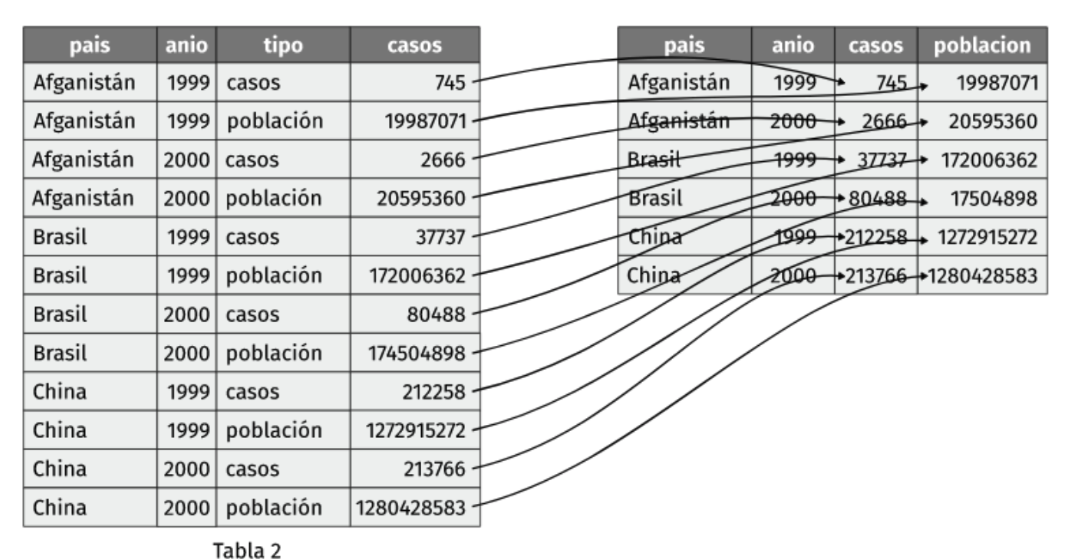

In [13]:
# Escribe aquí tu código
wider_to_long = wider_to_long.drop(columns="Unnamed: 0")
wider_to_long


,pais,anio,tipo,cuenta
0,Afganistán,1999,casos,745
1,Afganistán,1999,población,19987071
2,Afganistán,2000,casos,2666
3,Afganistán,2000,población,20595360
4,Brasil,1999,casos,37737
5,Brasil,1999,población,172006362
6,Brasil,2000,casos,80488
7,Brasil,2000,población,174504898
8,China,1999,casos,212258
9,China,1999,población,1272915272


In [14]:
wider_to_long=wider_to_long.pivot_table(index=('pais', 'anio'), columns='tipo', values='cuenta')
wider_to_long

tipo              casos   población
pais       anio                    
Afganistán 1999     745    19987071
           2000    2666    20595360
Brasil     1999   37737   172006362
           2000   80488   174504898
China      1999  212258  1272915272
           2000  213766  1280428583

## Separar datos que están juntos en una sola columnas

con .split(), .drop(), .concat()


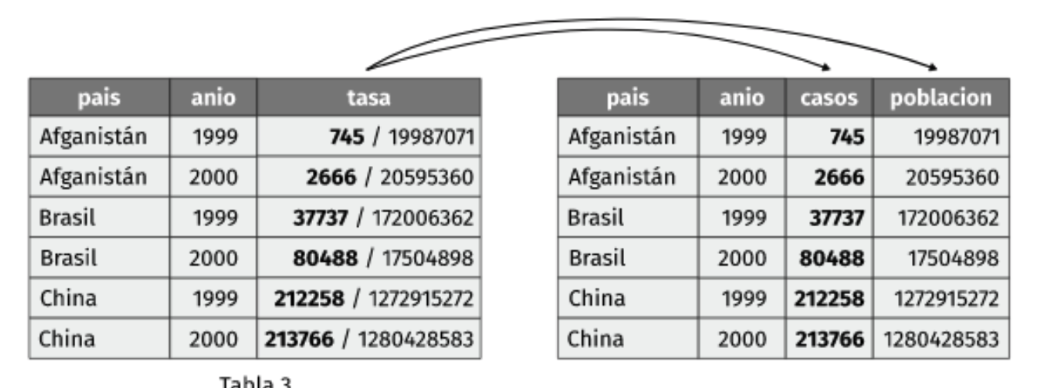

In [37]:
## Separar columnas
# Vamo a ver
separate = pd.read_csv('separate.csv')
separate

,pais,anio,tasa
0,Afganistán,1999,745/19987071
1,Afganistán,2000,2666/20595360
2,Brasil,1999,37737/172006362
3,Brasil,2000,80488/174504898
4,China,1999,212258/1272915272
5,China,2000,213766/1280428583


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
##  Escribe tu código aquí para separar str.split()
expanded= separate['tasa'].str.split('/', expand=True)
expanded.columns= ['casos', 'poblacion']
expanded



### Escribe tu código aquí para quitar una columna hint .drop()
separate.drop(columns ='tasa', inplace=True)
separate





### Escribe tu código aquí para unir todo en un solo df .concat()

pd.concat([separate, expanded], axis=1)




,pais,anio,casos,poblacion
0,Afganistán,1999,745,19987071
1,Afganistán,2000,2666,20595360
2,Brasil,1999,37737,172006362
3,Brasil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


## Unir datos que están en columnas diferentes


In [40]:
fusion = pd.read_csv('unite.csv')
fusion

,pais,siglo,anio,tasa
0,Afganistán,19,99,745/19987071
1,Afganistán,20,0,2666/20595360
2,Brasil,19,99,37737/172006362
3,Brasil,20,0,80488/174504898
4,China,19,99,212258/1272915272
5,China,20,0,213766/1280428583


In [44]:
##  Escribe tu código aquí 
# hint revisa el tipo de dato que hay
# une simplemente con +
fusion['completo'] = fusion['siglo']*100 + fusion['anio']
fusion


,pais,siglo,anio,tasa,completo
0,Afganistán,19,99,745/19987071,1999
1,Afganistán,20,0,2666/20595360,2000
2,Brasil,19,99,37737/172006362,1999
3,Brasil,20,0,80488/174504898,2000
4,China,19,99,212258/1272915272,1999
5,China,20,0,213766/1280428583,2000


# Merge methods (mutating joins)
![alt text](https://storage.googleapis.com/campus-cvs/lectures/3.4%20Merge%20Methods.png "Merge Methods")

**IMPORTANTE:** En esta clase se asume que los datos ya se encuentran en un formato comúnmente conocido como “tidy data”, es decir, donde cada fila corresponde a una única observación y cada columna contiene valores correspondientes a una única variable. En esta lectura, utilizaremos de ejemplo un data set que ya cumple con la anterior definición.

### Introducción

En la práctica, es raro que un análisis de datos involucre solamente una tabla. Normalmente tendrás muchas tablas contribuyendo a tu análisis y necesitas herramientas flexibles para combinarlas.

Si ha utilizado algún lenguaje de consulta a una base de datos, como SQL, recordará que hay ciertas operaciones que permiten unificar dos o más de esas tablas, complementando los valores entre ellas. A este tipo de operación se le llama **JOIN**

Hay 3 operaciones fundamentales que se pueden realizar con un **JOIN**:

- **Uniones uno a uno:** por ejemplo, al unir dos tablas por su columna de índices o ID (que debe contener valores únicos).

- **Uniones de muchos a uno:** por ejemplo, cuando se une un índice (único) a una o más columnas en una tabla diferente.

- **Uniones de muchos a muchos:** unión donde el criterio de índices abarca dos o más columnas. Por ejemplo, cuando queremos unir una tabla de aviones con una de vuelos y necesitamos unir mediante la aerolínea y el ID de vuelo, pues si solo lo hacemos mediante una de ellas, podría haber duplicados o no haber coincidencias.

#### Nota:
Al unir columnas en columnas (potencialmente una combinación de muchos a muchos), se descartarán los índices de las tablas pasadas.

Vale la pena dedicar un tiempo a comprender el resultado del caso de unión de muchos a muchos. En SQL / álgebra relacional estándar, si una combinación de índices aparece más de una vez en ambas tablas, la tabla resultante tendrá el producto cartesiano de los datos asociados. Aquí hay un ejemplo muy básico con una combinación de teclas única:

## Usemos mas a fondo merge

In [45]:
left = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)
right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

right2 = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K1", "K2"],
        "key2": ["K0", "K0", "K0", "K0"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)
left2 = pd.DataFrame(
    {
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


Trabajemos un poco con unir modificando varios parámetros


pd.merge(left, right, how: str='inner', on=None, left_on=None, right_on=None,....)



how : {'left', 'right', 'outer', 'inner'}
on : label or list


In [46]:
pd.merge?

In [47]:
pd.merge(left, right, on=['key'] )

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


## Merge methods

El argumento `how` del método `merge` especifica cómo determinar qué variables (columnas) serán incluidas en la tabla resultante. Si una valores no aparece en las tablas de la izquierda o de la derecha, los valores de la tabla combinada serán `NA`. Aquí hay un resumen de las opciones de `how` y sus nombres equivalentes de SQL:

| Merge method | Nombre del SQL Join | Descripción                                  |
| ------------ | ------------------- | -------------------------------------------- |
| left         | LEFT OUTER JOIN     | Usa únicamente las variables de la izquierda |
| right        | RIGHT OUTER JOIN    | Usa únicamente las variables de la derecha   |
| outer        | FULL OUTER JOIN     | Utiliza la unión de las variable de ambos data frames |
| inner        | INNER JOIN          | Utiliza la intersección de las variables de ambos data frames |

### Left Join

In [48]:
pd.merge(left2, right2, how="left", on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


### Right Join

In [49]:
pd.merge(left2, right2, how="right", on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


### Outer Join

In [50]:
pd.merge(left2, right2, how="outer", on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


### Inner Join

In [51]:
pd.merge(left2, right2, how="inner", on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


#### Nota:



Esos fueron los tipos de join que puedes realizar entre data frames.

El método `merge` acepta más argumentos en función de los casos especiales que se te vayan presentando. Para esos casos, te recomiendo consultar la [documentación](https://pandas.pydata.org/docs/user_guide/merging.html#database-style-dataframe-or-named-series-joining-merging).